<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Sentiment-Analysis/TRUMP_SENTIMENT_ANALYSIS_ATHENS_VOICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download el_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.8.0/el_core_news_sm-3.8.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
trump_articles_df_2025 = pd.read_csv("/content/gdrive/MyDrive/Athens.voice/Articles/Trump-articles-24 25-ATHENS VOICE.csv")

In [ ]:
len(trump_articles_df_2025)

778

In [ ]:
trump_articles_df_2025.head(1)

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/diethn...,«Σχέδιο Β» από τις Βρυξέλλες σε περίπτωση που ...,2025-04-30,19:50:02,Κοσμος,Newsroom,Συνεχίζονται οι συνομιλίες με την Ουάσινγκτον ...,Ανησυχίες ότι η Ουάσινγκτον δεν θα εξασφαλίσει...,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...,https://www.athensvoice.gr/images/1074x600/1/j...


In [ ]:
short_trump_fa_df = trump_articles_df_2025[['date',"text_body"]]
short_trump_fa_df = short_trump_fa_df.rename(columns={'text_body': 'text'} )

In [ ]:
short_trump_fa_df.tail()

,date,text
773,2024-11-20,"Ο Ντόναλντ Τραμπ, ο οποίος εξαπέλυε απειλές εν..."
774,2024-11-20,Ο Ντόναλντ Τραμπ επέλεξε τη συνιδρύτρια του Wo...
775,2024-11-20,"Πολύ κοντά σε νέο ρεκόρ βρίσκεται το Bitcoin, ..."
776,2024-11-20,Ο Βλαντιμίρ Πούτιν εμφανίζεται θετικός στο να ...
777,2024-11-20,Ο Ντόναλντ Τραμπ ανακοίνωσε χθες Τρίτη την πρό...


In [ ]:
short_trump_fa_df.dtypes

,0
date,object
text,object


In [ ]:
short_trump_fa_df['date'] = pd.to_datetime(short_trump_fa_df['date'], format='%Y-%m-%d')

In [ ]:
short_trump_fa_df.dtypes

,0
date,datetime64[ns]
text,object


In [ ]:
short_trump_fa_df.head()

,date,text
0,2025-04-30,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...
1,2025-04-30,"Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ δήλωσε κατά..."
2,2025-04-30,Οι παίκτες που έπαιζαν γκολφ στο γήπεδο Trump ...
3,2025-04-30,"Χωρίς τραμ θα είναι αύριο, Πέμπτη (1η Μαΐου) η..."
4,2025-04-30,Η οικονομία των ΗΠΑ κατέγραψε ύφεση κατά το πρ...


In [ ]:
emolex_df['word'].head(3)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
# Remove rows with missing values in the 'text' column
short_trump_fa_df = short_trump_fa_df.dropna(subset=['text'])

# Now fit the vectorizer on the cleaned data
matrix = vec.fit_transform(short_trump_fa_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(778, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

,word
8,αμην
15,γαμηλιο ταξιδι
24,διευθυντρια σχολειου
38,επικοινωνω
45,εκκλησια
...,...
13039,αληθης
13075,αναμφιβολως
13079,ανυπερβατος
13113,αναθηματικος


In [ ]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].sum(axis=1)

,0
0,4
1,6
2,7
3,1
4,9
...,...
773,18
774,20
775,3
776,2


In [ ]:
short_trump_fa_df.head(3)

,date,text
0,2025-04-30,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...
1,2025-04-30,"Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ δήλωσε κατά..."
2,2025-04-30,Οι παίκτες που έπαιζαν γκολφ στο γήπεδο Trump ...


In [ ]:
short_trump_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_trump_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_trump_fa_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_trump_fa_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_trump_fa_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_trump_fa_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_trump_fa_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_trump_fa_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_trump_fa_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_trump_fa_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_trump_fa_df.head()

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2025-04-30,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...,0,3,3,2,4,4,9,2,8,4
1,2025-04-30,"Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ δήλωσε κατά...",1,5,2,1,2,6,5,2,5,2
2,2025-04-30,Οι παίκτες που έπαιζαν γκολφ στο γήπεδο Trump ...,4,8,3,1,2,7,6,1,6,2
3,2025-04-30,"Χωρίς τραμ θα είναι αύριο, Πέμπτη (1η Μαΐου) η...",1,1,0,0,0,1,2,2,3,2
4,2025-04-30,Η οικονομία των ΗΠΑ κατέγραψε ύφεση κατά το πρ...,5,13,1,8,1,9,3,7,14,6


In [ ]:
short_trump_fa_df.reset_index(inplace=True)
short_trump_fa_df.set_index('date', inplace=True)
short_trump_fa_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2025-04-30,0,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...,0,3,3,2,4,4,9,2,8,4
2025-04-30,1,"Ο πρόεδρος των ΗΠΑ, Ντόναλντ Τραμπ δήλωσε κατά...",1,5,2,1,2,6,5,2,5,2
2025-04-30,2,Οι παίκτες που έπαιζαν γκολφ στο γήπεδο Trump ...,4,8,3,1,2,7,6,1,6,2
2025-04-30,3,"Χωρίς τραμ θα είναι αύριο, Πέμπτη (1η Μαΐου) η...",1,1,0,0,0,1,2,2,3,2
2025-04-30,4,Η οικονομία των ΗΠΑ κατέγραψε ύφεση κατά το πρ...,5,13,1,8,1,9,3,7,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-20,773,"Ο Ντόναλντ Τραμπ, ο οποίος εξαπέλυε απειλές εν...",9,23,6,4,1,18,11,0,8,10
2024-11-20,774,Ο Ντόναλντ Τραμπ επέλεξε τη συνιδρύτρια του Wo...,11,31,4,13,6,20,9,11,15,12
2024-11-20,775,"Πολύ κοντά σε νέο ρεκόρ βρίσκεται το Bitcoin, ...",0,4,0,0,0,3,2,0,1,0


<Axes: xlabel='date'>

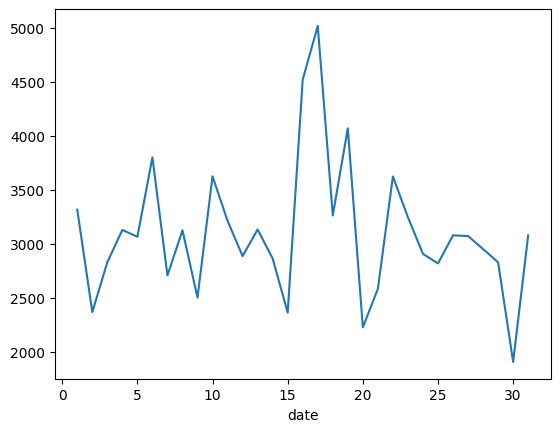

In [ ]:
short_trump_fa_df['text'].str.len().groupby(by=short_trump_fa_df.index.day).mean().plot()

<Axes: xlabel='date'>

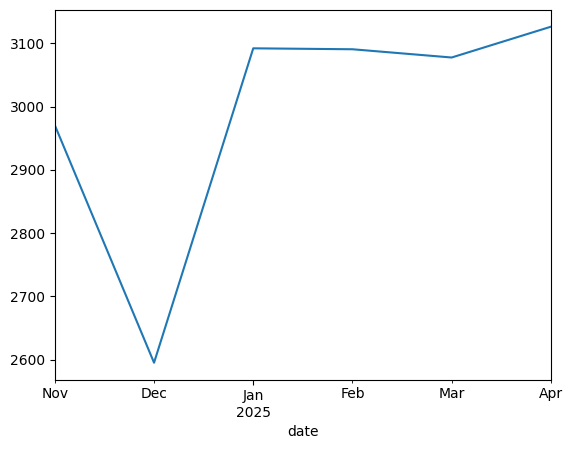

In [ ]:
short_trump_fa_df['text'].str.len().resample('ME').mean().plot()

<Axes: ylabel='date'>

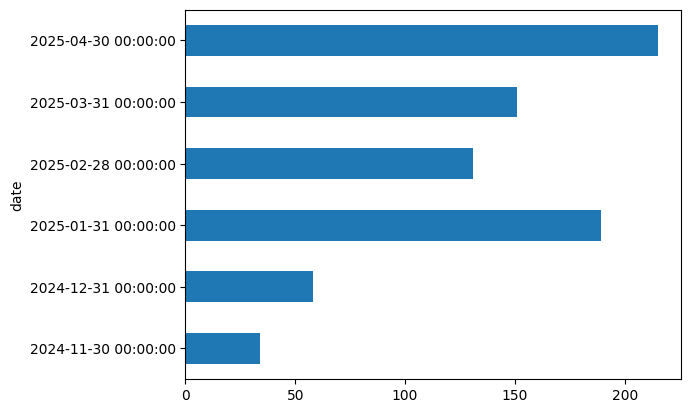

In [ ]:
short_trump_fa_df['text'].resample('ME').count().plot(kind='barh')

<Axes: xlabel='date'>

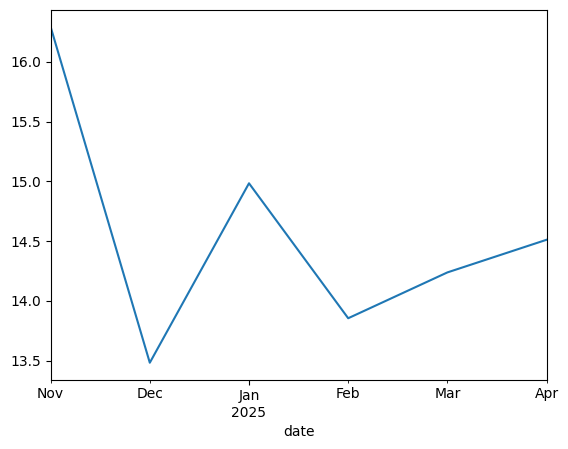

In [ ]:
short_trump_fa_df['positive'].resample('ME').mean().plot()

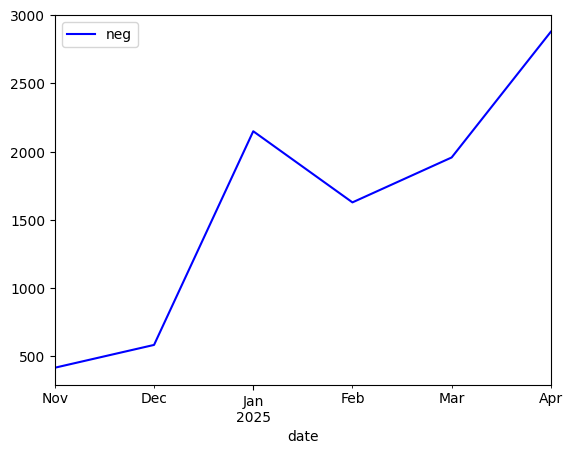

In [ ]:
short_trump_fa_df['negative'].resample('ME').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

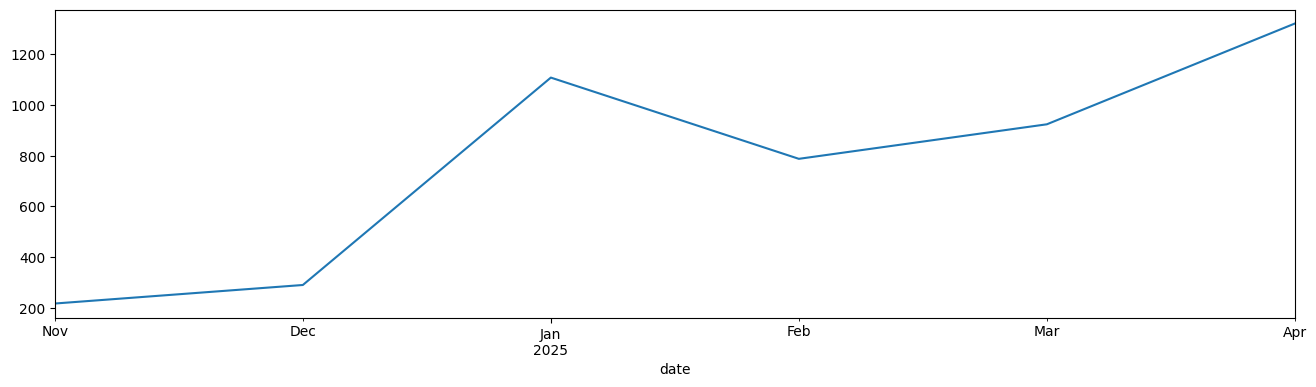

In [ ]:
short_trump_fa_df['anger'].resample('ME').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

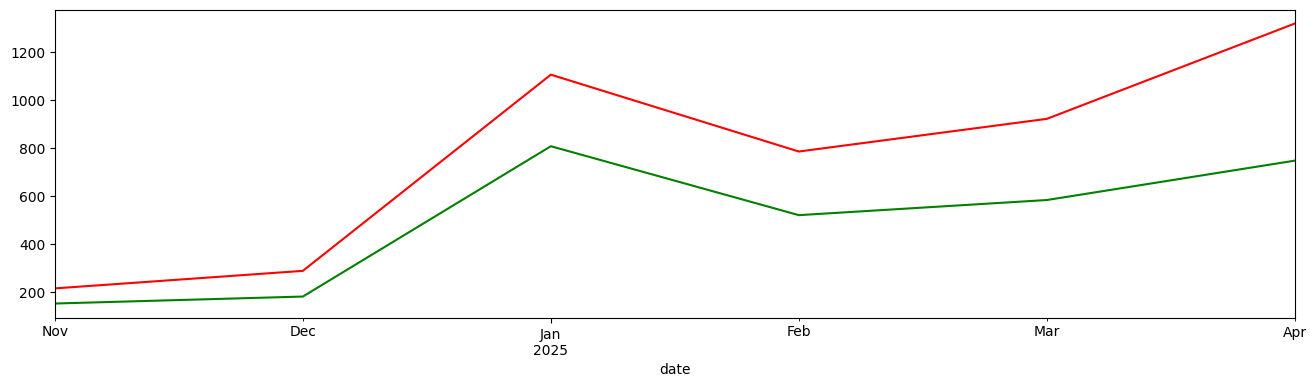

In [ ]:
ax = short_trump_fa_df['anger'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_trump_fa_df['joy'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='date'>

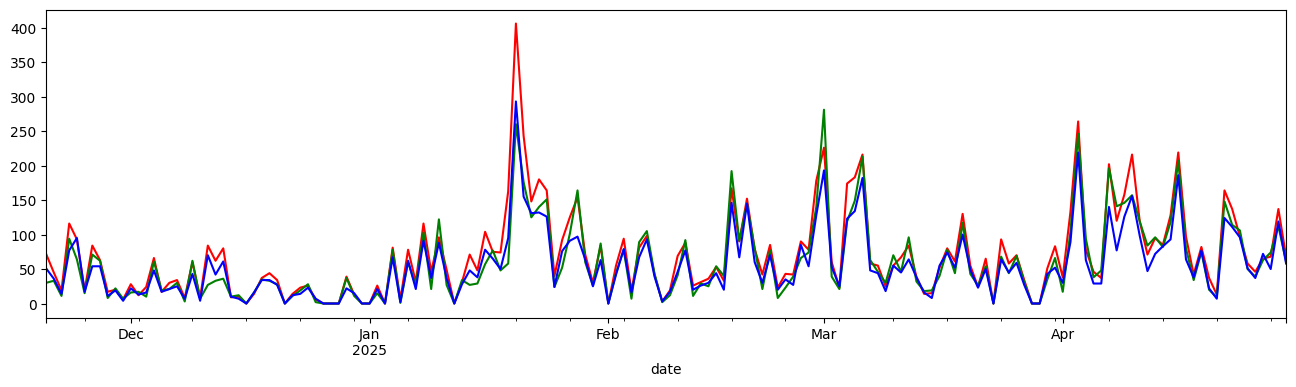

In [ ]:
ax = short_trump_fa_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_trump_fa_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_trump_fa_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
plt.style.use('seaborn-v0_8-bright')

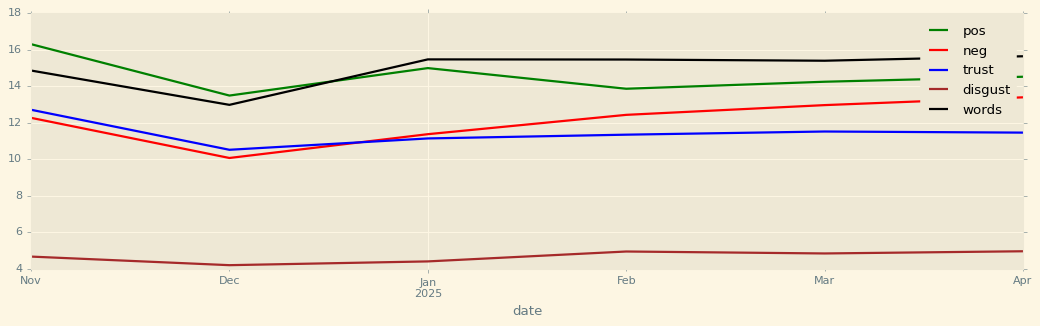

In [ ]:
ax = short_trump_fa_df['positive'].resample('ME').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_trump_fa_df['negative'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_trump_fa_df['trust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_trump_fa_df['disgust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_trump_fa_df['text'].str.len().resample('ME').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='date'>

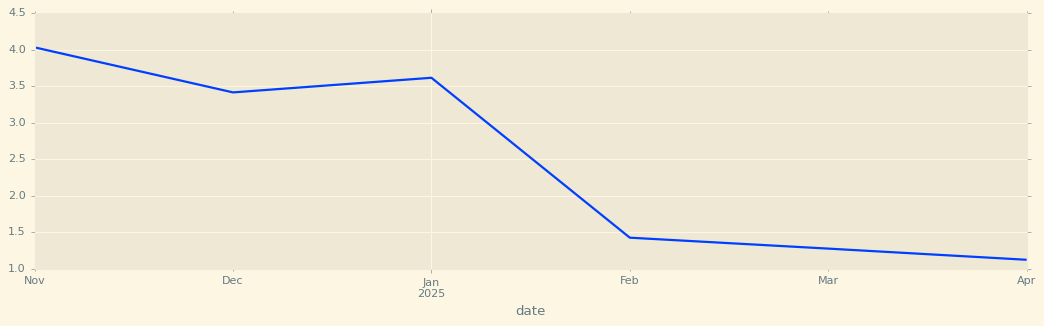

In [ ]:
short_trump_fa_df['pos/neg'] = short_trump_fa_df['positive'] - short_trump_fa_df['negative']
short_trump_fa_df['pos/neg'].resample('ME').mean().plot(figsize=(16,4))

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

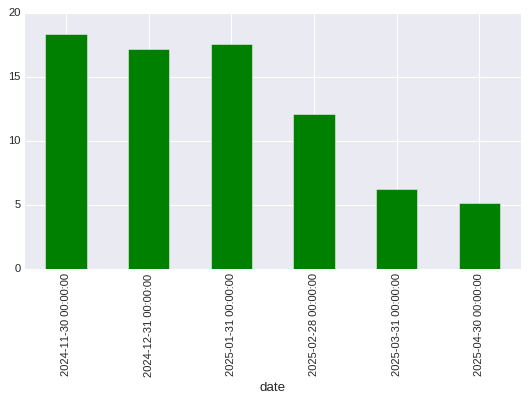

In [ ]:
short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'] = short_trump_fa_df.positive*100//short_trump_fa_df[['positive','negative']].sum(
        axis=1) - short_trump_fa_df.negative*100//short_trump_fa_df[['positive','negative']].sum(axis=1)

short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean().plot(kind='bar',
                                                                               color=(short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))


In [ ]:
short_trump_fa_df[(short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2025-04-29,9,0,1,-100.0
2025-04-26,29,6,0,100.0
2025-04-21,62,7,0,100.0
2025-02-27,383,0,4,-100.0
2025-02-24,401,5,0,100.0
2025-02-21,412,7,0,100.0
2025-02-09,464,4,0,100.0
2025-02-09,465,1,0,100.0
2025-01-22,557,4,0,100.0


In [ ]:
temp_df = short_trump_fa_df.reset_index()

In [ ]:
# Use iloc to select rows by their integer position
short_trump_fa_df.iloc[[20,5,0], short_trump_fa_df.columns.get_indexer(['article_url','title', 'text'])]

,(-)αρνητικότητα | θετικότητα(+),(-)αρνητικότητα | θετικότητα(+),text
date,,,
2025-04-28,-9.0,-9.0,Ο πόλεμος που έχει εξαπολύσει η κυβέρνηση Τραμ...
2025-04-30,69.0,69.0,"Ο πρόεδρος των Ηνωμένων Πολιτειών, Ντόναλντ Τρ..."
2025-04-30,-45.0,-45.0,Η Ευρωπαϊκή Ένωση ετοιμάζει ένα «σχέδιο Β» για...
